## Resource consumption of Single Database
As a DBA, I need an overview of resource consumption in a database so that I can check performance problems by observing excessive consumption of specific resources, and track how much work is being accomplished in the database. Here is an example of getting data from Repository Views with CPU consumption, Logical Reads, Physical Reads, Memory Usage, and Activity Response Time as health indicators for a given interval. From the following examples, we can find out how resources are being used across the enterprise, and the general availability of those resources.
* Resource consumption by hour
* CPU utilization by hour
* Memory usage by hour

### Step 1. Load Db2 Extension

Before running all the following examples, you need to load the Db2 extension so that you can use the magic command `%sql`.

The cell below will load the Db2 extension. Note that it will take a few seconds for the extension to load, so you should generally wait until message "Db2 Extensions Loaded" is displayed. You can find out more about the Db2 Extensions at https://github.com/DB2-Samples/db2jupyter.

In [4]:
%run db2.jupyter.ipynb

Pixiedust database opened successfully


DB2 Extensions Loaded.


### Step 2. Connect to Db2
Before you run any SQL commands, you must create a connection to your target database by using the following command syntax:

     %sql CONNECT TO [db_name] USER [user_name] USING [password]|[?] HOST [IP_address] PORT [port]

   * db_name - Database name to be connected. Use your DSM repository database name as the input.
   * user_name - User ID to connect to the database.
   * password - If `?` is used for the password, you must manully input the password when prompted.
   * IP_address - Use `localhost` or IP address if you are connecting to a remote server.
   * port - Port number to connect your database.
    
The message "Connection successful" will be displayed when the connection is created successfully. 

You can update the connection parameters and credential to another database if necessary.

In [5]:
%sql CONNECT TO dsxdemo USER db2inst1 USING ? HOST 9.30.253.63 PORT 50002

Password [password]: ········
Connection successful.


### Parameter Description 
In each of the following examples, we use the `queryCondition` keyword to pass the values of the following parameters in order to pull history data through the repository view: 
* DB_CONN_ID: Connection name of the monitored database that you add to the DSM.
* END_TIME: Target end time that you want to query.
* INTERVAL: int(1~100), which stands for time period (hours) before the END_TIME.
* REPORT_TYPE: 4 report types(case-insensitive): Resource / CPU / Memory / All
    1. Resource: includes metrics for CPU time consumed in microseconds, Logical Reads, Phyiscal Reads, number of queries, and average database response time.
    2. CPU: includes metrics for CPU time consumed by system and data server.
    3. Memory: shows the maximum memory used by database.
    4. All: shows all reports including Resource, CPU, and Memory.

Format of input: 
* queryCondition = "DB_CONN_ID='irww' END_TIME='2018-01-05-00:00:00' INTERVAL=18 REPORT_TYPE='all'"

Note: 
1. All parameters must be separated by a whitespace,
2. If the value of any parameter is changed, you must click [Save and Checkpoint] to save the changes before running the `%run` command.

You can find the details of the implementation in the notebook `single-db-resource-consumption-scripts.jupyter.ipynb`.


### Example 1: 
This example shows how to use SQL statements to get CPU Time, Logical Reads, Physical Reads, and Activity Time from the Repository view THROUGHPUT_ALL. 
* CPU_SEC: CPU time consumed in microseconds. In this example, the CPU time is scaled to seconds.
* LOGICAL_READS and PHYSICAL_READS: Measure of I/O consumed by a database.
* Activities: The number of queries that were running against the database.
* AVG_ACTIVITY_TIME_MSEC: Average database response time for all activities, including SQL execution, I/O, and lock waits.

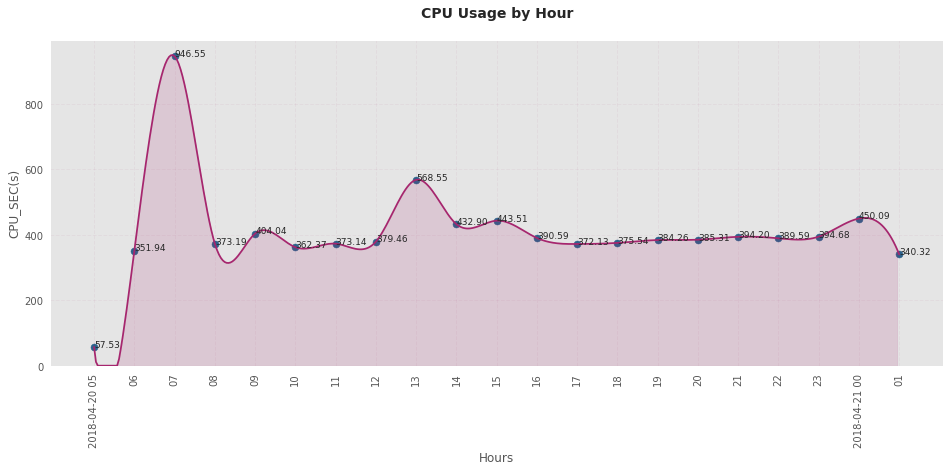

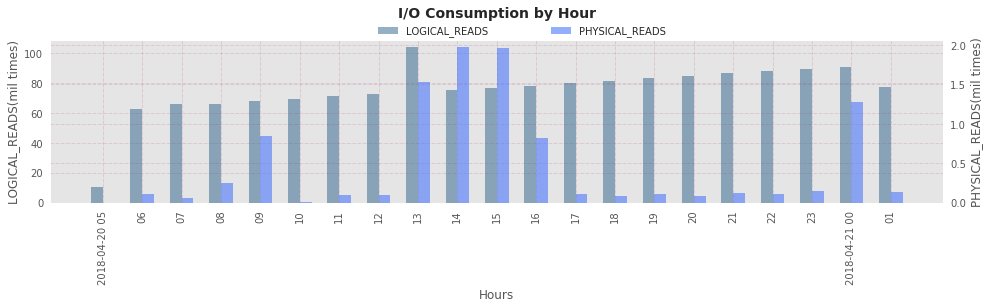

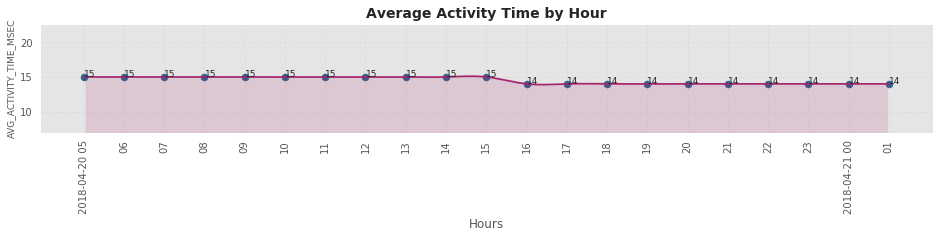

In [10]:
# input value of parameters to pull history data through repository view
queryCondition = "DB_CONN_ID='dsxdemo' END_TIME='2018-04-21-01:50:00' INTERVAL=20 REPORT_TYPE='resource'"

# pass the values to a variable
!echo $queryCondition > singleDBCondition

# get content from the variable and pass values to select statement 
# run select statment to get resource consumption data for specified connection
# display CPU Usage, Logical Reads, Physical Reads, Average Activity Time in graphs
%run single-db-resource-consumption-scripts.jupyter.ipynb


### Example 2: 
This example shows how to get CPU utilization rate and distribution from the repository view THROUGHPUT_SYSTEM. From the report, you can know how much percentage of CPU utilization is consumed by system, and how much time was spent in data server.
* CPU_SYSTEM: Time spent running the kernel code
* CPU_USER: Time spent running the user (non-kernel) code
* DB2_CPU_SYSTEM:Time spent for Db2 processes when running the kernel code
* DB2_CPU_USER: Time spent for Db2 processes when running the user code

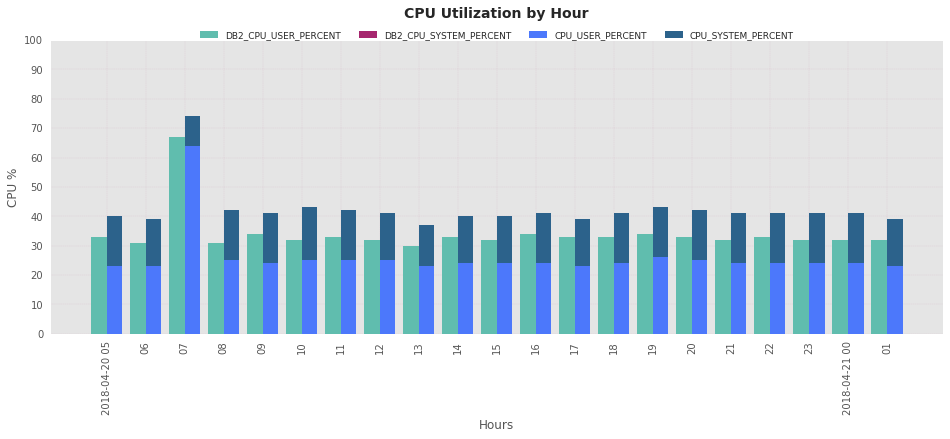

In [11]:
# input value of parameters to pull history data through repository view
queryCondition = "DB_CONN_ID='irww' END_TIME='2018-04-21-01:50:00' INTERVAL=20 REPORT_TYPE='cpu'"

# pass the value to a variable
!echo $queryCondition > singleDBCondition

# get content from the variable and pass values to select statement 
# run select statment to get cpu utilization data for the specified connection
# display CPU Utilization in graph
%run single-db-resource-consumption-scripts.jupyter.ipynb

### Example 3: 
This example shows how to find out total memory in use by the selected database as time goes by. By using the MEM_DB_TOTAL_USED view, you can know the memory usage for each monitored database.
* MEMORY_USAGE: Maximum memory used by database in GB

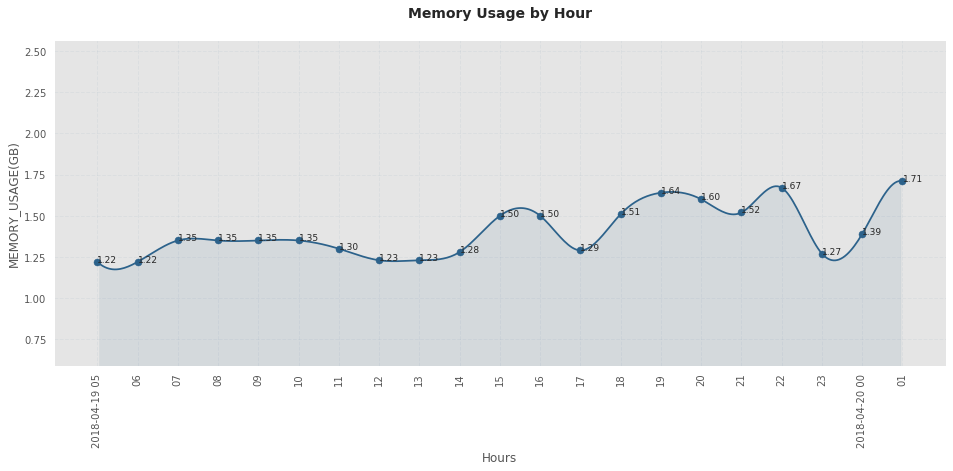

In [8]:
# input value of parameters to pull history data through repository view
queryCondition = "DB_CONN_ID='dsxdemo' END_TIME='2018-04-20-01:40:00' INTERVAL=20 REPORT_TYPE='memory'"

# pass the value to a variable
!echo $queryCondition > singleDBCondition

# get content from the variable and pass values to select statement 
# run select statment to get memory usage data for specified connection
# display Memory Usage in graph
%run single-db-resource-consumption-scripts.jupyter.ipynb